# Exercise 1: Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import array

**warm_up_exercise**

In [2]:
def warm_up_exercise():
    return(np.identity(5))

In [3]:
warm_up_exercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

**Linear Regression with One Variable**

In [4]:
data_set_one = np.loadtxt('ex1data1.txt', delimiter=',')
x_values = data_set_one[:, :1]
y_values = data_set_one[:, 1:]

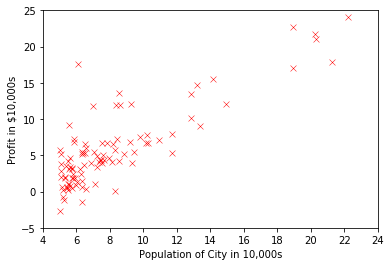

In [5]:
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.xlim(4,24)
plt.ylim(-5,25)
plt.xticks(np.arange(4, 25, 2))
plt.scatter(x_values, y_values, marker='x', c='red', s=35, linewidth=0.5)
plt.show()